# Poincare Boundary Condition

Most of the tutorials use last closed flux surface (LCFS) as the boundary condition for 3D equilibrium. This tutorial will cover another way to define boundary condition using DESC.

In [1]:
import sys
import os

sys.path.insert(0, os.path.abspath("."))
sys.path.append(os.path.abspath("../../../"))

If you have access to a GPU, uncomment the following two lines. 

In [2]:
# from desc import set_device
# set_device("gpu")

Import required stuff.

In [3]:
%matplotlib inline
import numpy as np

from desc.objectives import (
    ObjectiveFunction,
    ForceBalance,
    get_fixed_xsection_constraints,
    get_fixed_boundary_constraints,
)
from desc.examples import get
from desc.optimize import Optimizer
from desc.plotting import plot_comparison, plot_section
from desc.geometry import PoincareRZLSection
from desc.equilibrium import Equilibrium

2024-08-18 18:46:47.363823: W external/xla/xla/service/gpu/nvptx_compiler.cc:836] The NVIDIA driver's CUDA version is 12.5 which is older than the PTX compiler version (12.6.20). Because the driver is older than the PTX compiler version, XLA is disabling parallel compilation, which may slow down compilation. You should update your NVIDIA driver or use the NVIDIA-provided CUDA forward compatibility packages.


DESC version 0.12.1+401.g7b316755c.dirty,using JAX backend, jax version=0.4.31, jaxlib version=0.4.31, dtype=float64
Using device: NVIDIA A100 80GB PCIe (id=0), with 80.00 GB available memory


### Solving Poincare Boundary Condition from an existing equilibrium

To first show that Poincare BC gives the same result with LCFS, let's set our optimization problem by taking the $\zeta$=0 Poincare cross-section of Heliotron equilibrium.

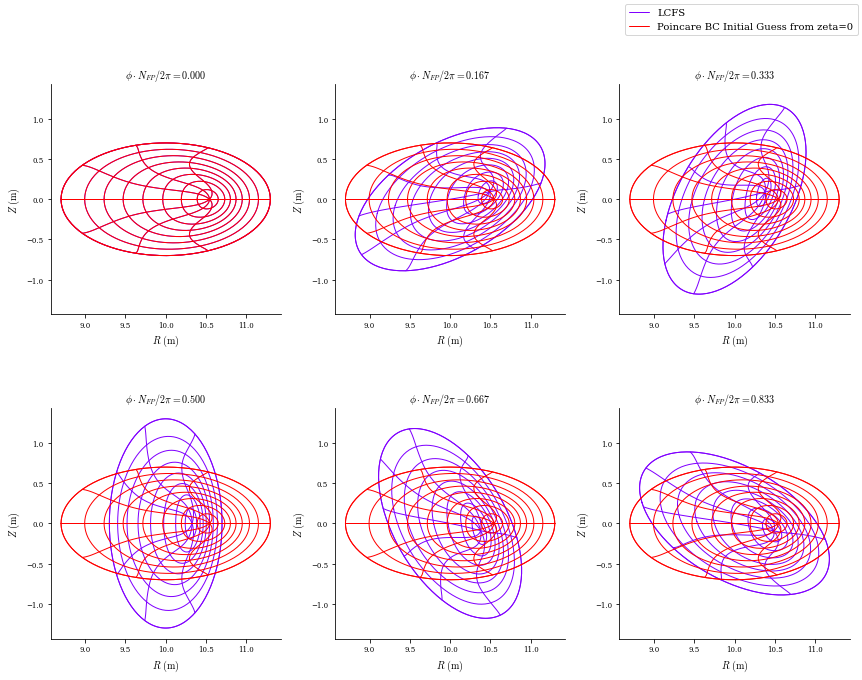

In [4]:
eq = get("HELIOTRON")
zeta = 0
eq_poin = eq.set_poincare_equilibrium(zeta=zeta)
plot_comparison(eqs=[eq,eq_poin],labels=['LCFS',f'Poincare BC Initial Guess from zeta=0']);

We can also choose $\zeta = \pi$ as the boundary condition and set it from an existing equilibrium.

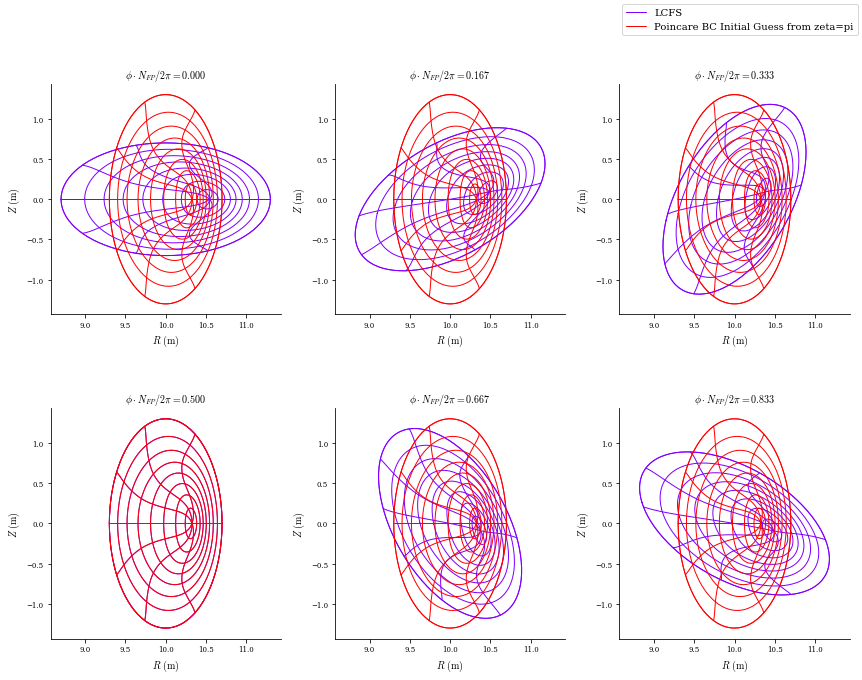

In [5]:
zeta = np.pi
eq_poin = eq.set_poincare_equilibrium(zeta=zeta)
plot_comparison(eqs=[eq,eq_poin],labels=['LCFS','Poincare BC Initial Guess from zeta=pi']);

Now, we can solve the newly created 'eq_poin' as usual. The code will apply some checks to see if you are trying to solve a Poincare BC problem or LCFS. Then, add the required constraints and objectives before sending it to the optimizer.

Building objective: force
Precomputing transforms
Timer: Precomputing transforms = 1.15 sec
Timer: Objective build = 3.07 sec
Building objective: poincare R
Building objective: poincare Z
Building objective: poincare Lambda
Building objective: fixed Psi
Building objective: fixed pressure
Building objective: fixed iota
Building objective: self_consistency boundary R
Building objective: self_consistency boundary Z
Building objective: lambda gauge
Building objective: self_consistency axis R
Building objective: self_consistency axis Z
Building objective: self_consistency section R
Building objective: self_consistency section Z
Building objective: self_consistency section Lambda
Timer: Objective build = 1.78 sec
Timer: Linear constraint projection build = 4.07 sec
Number of parameters: 507
Number of objectives: 1900
Starting optimization
Using method: lsq-exact
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1          1.073e-

Building objective: self_consistency axis R
Building objective: self_consistency axis Z
Building objective: self_consistency section R
Building objective: self_consistency section Z
Building objective: self_consistency section Lambda
Timer: Objective build = 1.11 sec
Timer: Linear constraint projection build = 3.53 sec
Number of parameters: 1521
Number of objectives: 4940
Starting optimization
Using method: lsq-exact
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1          2.370e-04                                    4.087e+00   
       1              4          5.088e-05      1.861e-04      2.102e-02      1.820e+00   
       2              6          7.303e-06      4.358e-05      9.457e-03      3.189e-01   
       3              8          4.997e-06      2.306e-06      4.574e-03      4.535e-02   
       4              9          4.333e-06      6.641e-07      8.562e-03      8.758e-02   
       5             10          

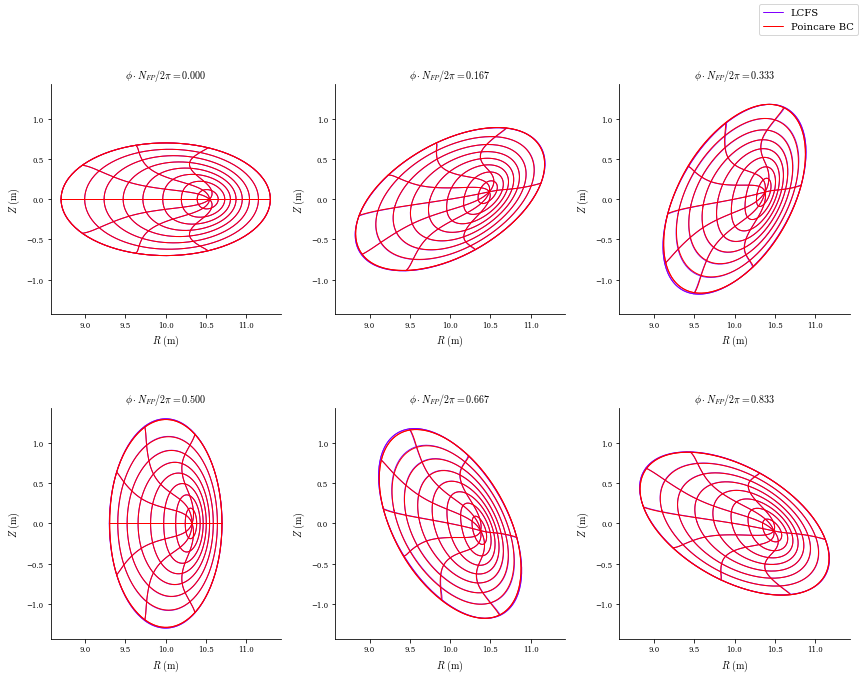

In [6]:
eq_poin = eq.set_poincare_equilibrium()  # the default zeta value is 0
eq_poin.change_resolution(N=1, N_grid=2)

constraints = get_fixed_xsection_constraints(eq=eq_poin)
objective = ObjectiveFunction(ForceBalance(eq_poin))
optimizer = Optimizer("lsq-exact")

eq_poin.solve(
    verbose=3, 
    objective=objective, 
    constraints=constraints, 
    optimizer=optimizer,
    maxiter=100, 
)

eq_poin.change_resolution(N=eq.N, N_grid=2*eq.N)

constraints = get_fixed_xsection_constraints(eq=eq_poin)
objective = ObjectiveFunction(ForceBalance(eq_poin))
optimizer = Optimizer("lsq-exact")

eq_poin.solve(
    verbose=3, 
    objective=objective, 
    constraints=constraints, 
    optimizer=optimizer,
    maxiter=100, 
)
plot_comparison(eqs=[eq,eq_poin],labels=['LCFS',f'Poincare BC']);

Building objective: force
Precomputing transforms
Timer: Precomputing transforms = 85.9 ms
Timer: Objective build = 280 ms
Building objective: lcfs R
Building objective: lcfs Z
Building objective: fixed Psi
Building objective: fixed pressure
Building objective: fixed iota
Building objective: fixed sheet current
Building objective: self_consistency boundary R
Building objective: self_consistency boundary Z
Building objective: lambda gauge
Building objective: self_consistency axis R
Building objective: self_consistency axis Z
Building objective: self_consistency section R
Building objective: self_consistency section Z
Building objective: self_consistency section Lambda
Timer: Objective build = 1.39 sec
Timer: Linear constraint projection build = 3.46 sec
Number of parameters: 1593
Number of objectives: 4940
Starting optimization
Using method: lsq-exact
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1          2.174e-01    

      79             84          9.531e-08      3.818e-09      1.581e-02      8.246e-03   
      80             85          9.163e-08      3.683e-09      1.583e-02      9.617e-03   
      81             86          8.807e-08      3.557e-09      1.585e-02      1.146e-02   
      82             87          8.464e-08      3.436e-09      1.587e-02      1.318e-02   
      83             88          8.133e-08      3.312e-09      1.588e-02      1.479e-02   
      84             89          7.817e-08      3.161e-09      1.590e-02      1.634e-02   
      85             90          7.532e-08      2.846e-09      1.590e-02      1.754e-02   
      86             91          7.384e-08      1.476e-09      1.587e-02      2.260e-02   
      87             92          6.794e-08      5.898e-09      3.833e-03      5.793e-03   
      88             93          6.635e-08      1.599e-09      7.858e-03      5.705e-03   
      89             94          6.576e-08      5.821e-10      1.598e-02      5.488e-03   

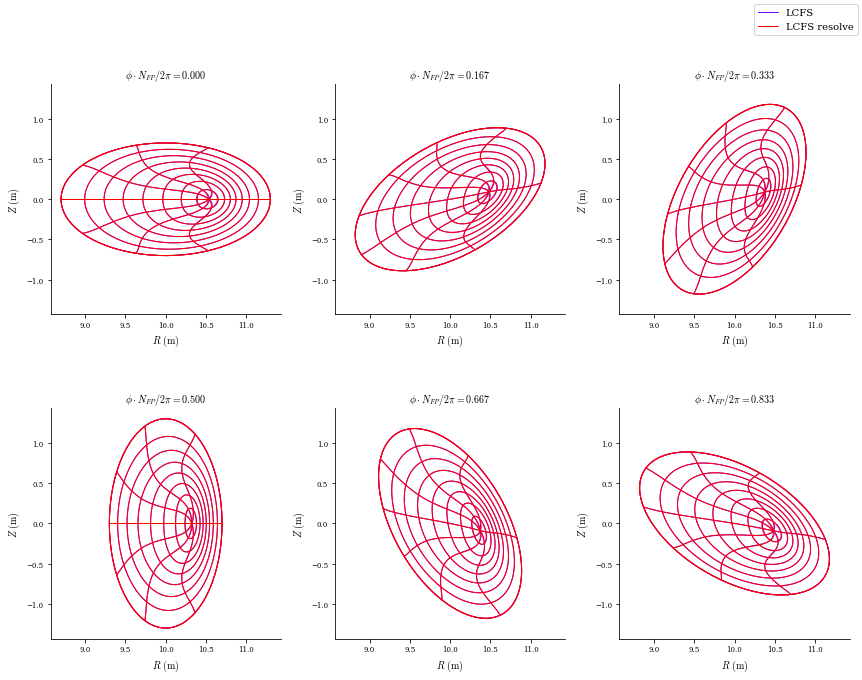

In [7]:
eq = get("HELIOTRON")
eq_fixed = Equilibrium(
    surface=eq.surface,
    pressure=eq.pressure,
    iota=eq.iota,
    Psi=eq.Psi,  # flux (in Webers) within the last closed flux surface
    NFP=eq.NFP,  # number of field periods
    L=eq.L,  # radial spectral resolution
    M=eq.M,  # poloidal spectral resolution
    N=eq.N,  # toroidal spectral resolution
    L_grid=eq.L_grid,  # real space radial resolution, slightly oversampled
    M_grid=eq.M_grid,  # real space poloidal resolution, slightly oversampled
    N_grid=eq.N_grid,  # real space toroidal resolution
    sym=eq.sym,  # explicitly enforce stellarator symmetry
    spectral_indexing=eq._spectral_indexing,
)
constraints = get_fixed_boundary_constraints(eq=eq_fixed)
objective = ObjectiveFunction(ForceBalance(eq_fixed))
optimizer = Optimizer("lsq-exact")

eq_fixed.solve(
    verbose=3,
    objective=objective,
    constraints=constraints,
    optimizer=optimizer,
    maxiter=200,
)
plot_comparison(eqs=[eq,eq_fixed],labels=['LCFS','LCFS resolve']);

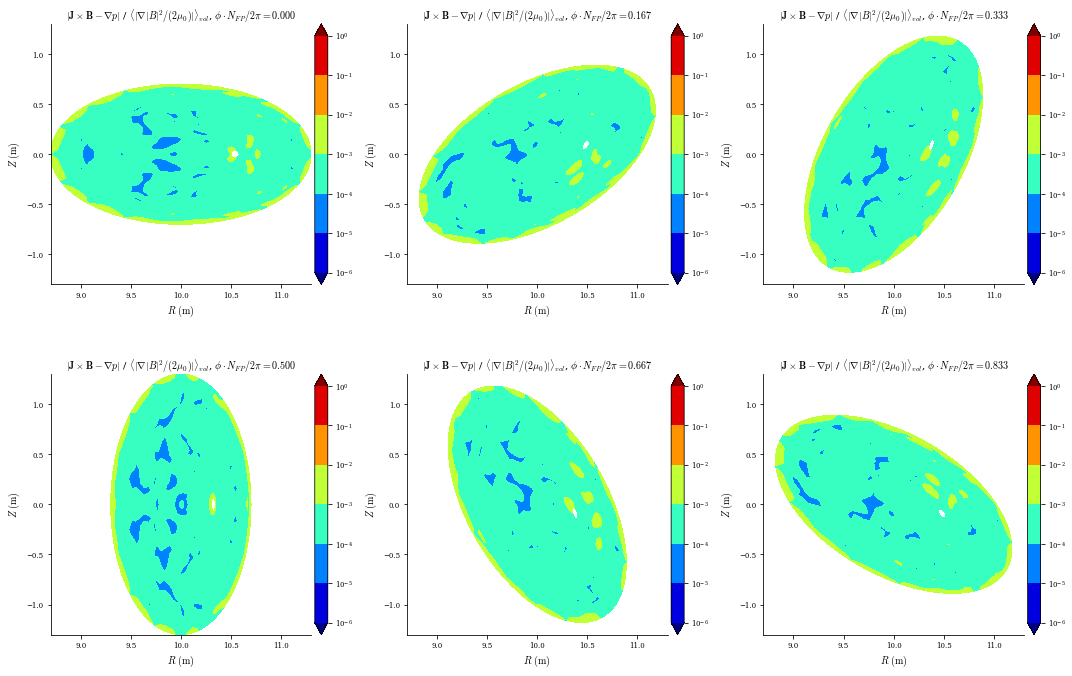

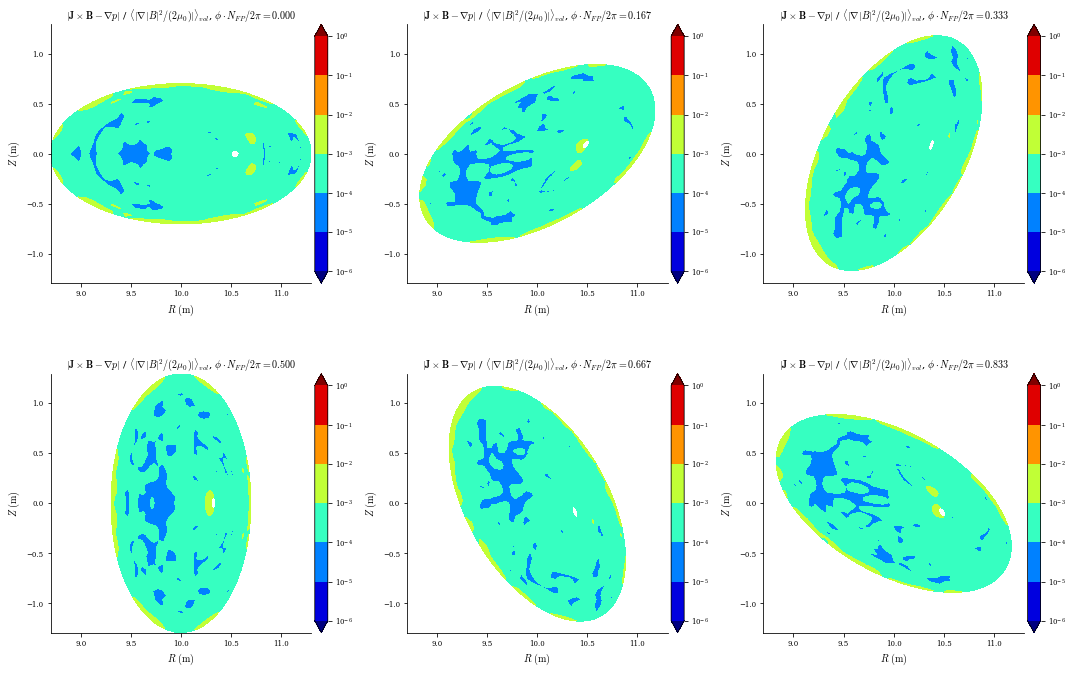

In [8]:
plot_section(eq, "|F|", norm_F=True, log=True);
plot_section(eq_poin, "|F|", norm_F=True, log=True);

In [ ]:
f1 = (
    eq.compute("<|F|>_vol")["<|F|>_vol"]
    / eq.compute("<|grad(|B|^2)|/2mu0>_vol")["<|grad(|B|^2)|/2mu0>_vol"]
)
f2 = (
    eq_poin.compute("<|F|>_vol")["<|F|>_vol"]
    / eq_poin.compute("<|grad(|B|^2)|/2mu0>_vol")["<|grad(|B|^2)|/2mu0>_vol"]
)
print(f"Force error eq: {f1:.4e}")
print(f"Force error eq_poin: {f2:.4e}")

### Creating a new Poincare surface to fix 

We can also create a new surface object called "PoincareRZLSection" to set our optimization problem as LCFS.

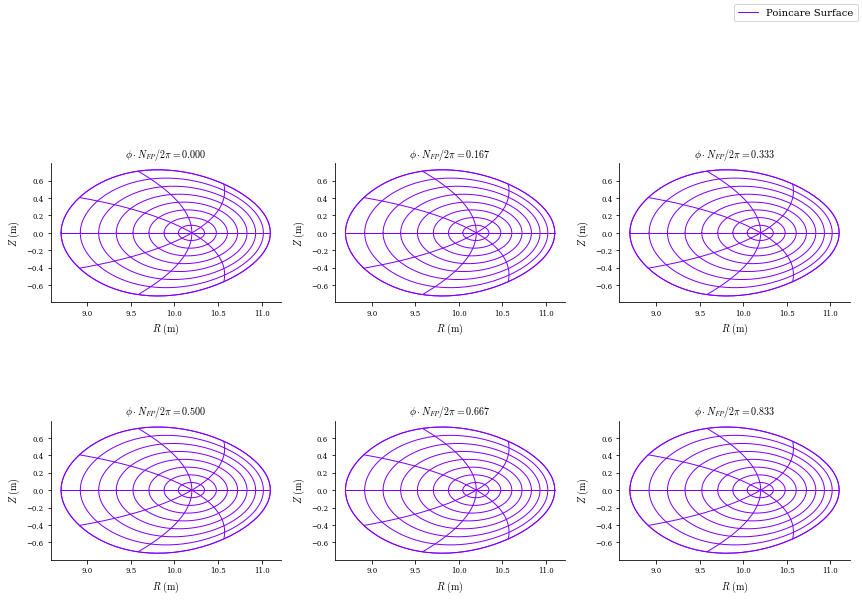

In [9]:
R_lmn = np.array([10, -1.2, -0.2, 0.1])
modes_R = np.array([[0, 0], [1, 1], [2, 0], [2, 2]])

Z_lmn = np.array([0.7, -0.04, -0.02])
modes_Z = np.array([[1, -1], [2, -2], [3, -3]])

L_lmn = np.array([.1])
modes_L = np.array([[1, -1]])

section = PoincareRZLSection(R_lmn=R_lmn, modes_R=modes_R,Z_lmn=Z_lmn, modes_Z=modes_Z,L_lmn=L_lmn, modes_L=modes_L)

eq_poincare = Equilibrium(
            xsection=section,
            pressure=0,
            iota=0,
            Psi=eq.Psi,  # flux (in Webers) within the last closed flux surface
            NFP=10,  # number of field periods
            L=5,  # radial spectral resolution
            M=5,  # poloidal spectral resolution
            N=4,  # toroidal spectral resolution
            L_grid=eq.L_grid,  # real space radial resolution, slightly oversampled
            M_grid=eq.M_grid,  # real space poloidal resolution, slightly oversampled
            N_grid=eq.N_grid,  # real space toroidal resolution
            sym=True,  # explicitly enforce stellarator symmetry
            spectral_indexing=eq._spectral_indexing,
        )

plot_comparison(eqs=[eq_poincare],labels=['Poincare Surface']);